In [1]:
import sympy as sy
from sympy import lambdify
from sympy import *
import matplotlib.pyplot as plt
import numpy as np


In [2]:


def sy_diff():
    x = sy.symbols('x')
    function = (sin(x)+1)**(sin(cos(x)))
    sym_deri = sy.diff(function)
    num_deri = lambdify(x, sym_deri)
    return lambdify(x, function), num_deri


In [5]:
def problem1():
    f, f_prime = sy_diff()
    x_vec = np.linspace(-np.pi, np.pi, 200)
    fx = f(x_vec)
    f_primex = f_prime(x_vec)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, f_primex, label = r'$f^\prime(x)$')
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    plt.show()

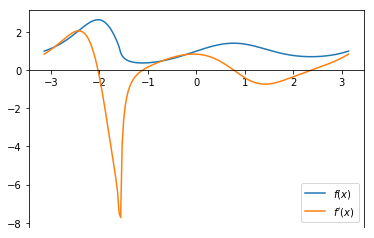

In [6]:
problem1()

In [7]:
def forward_diff1(f, x_vec, h):
    return (f(x_vec+h) - f(x_vec))/h

def forward_diff2(f, x_vec, h):
    return (-3*f(x_vec)+4*f(x_vec+h)-f(x_vec+2*h))/(2*h)

def backward_diff1(f, x_vec, h):
    return (f(x_vec) - f(x_vec-h))/h

def backward_diff2(f, x_vec, h):
    return (3*f(x_vec)- 4*f(x_vec-h)+f(x_vec-2*h))/(2*h)


def centered_diff1(f, x_vec, h):
    return (f(x_vec + h) - f(x_vec-h))/(2*h)

def centered_diff2(f, x_vec, h):
    return (f(x_vec - 2*h) - 8*f(x_vec-h)+ 8*f(x_vec+h) - f(x_vec+2*h))/(12*h)

def problem2():
    f, f_prime = sy_diff()
    x_vec = np.linspace(-np.pi, np.pi, 200)
    
    fwd_deri = forward_diff1(f, x_vec, 0.01)
    bkwd_deri = backward_diff1(f, x_vec, 0.01)
    cen_deri = centered_diff1(f, x_vec, 0.01)
    fwd_deri2 = forward_diff2(f, x_vec, 0.01)
    bkwd_deri2 = backward_diff2(f, x_vec, 0.01)
    cen_deri2 = centered_diff2(f, x_vec, 0.01)
    fx = f(x_vec)
    f_primex = f_prime(x_vec)
    
    plt.figure(figsize = [10,20])
    
    plt.subplot(421)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, f_primex, label = r'$f^\prime(x)$')
    plt.title("Analytical derivative")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    plt.subplot(423)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, fwd_deri, label = "fwd order 1")
    plt.title("Forward approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    plt.subplot(424)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, fwd_deri2, label = "fwd order 2")
    plt.title("Forward approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    
    plt.subplot(425)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, bkwd_deri, label = "bkwd order 1")
    plt.title("Backward approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    plt.subplot(426)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, bkwd_deri2, label = "bkwd order 2")
    plt.title("Backward approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    plt.subplot(427)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, cen_deri, label = "centered order 1")
    plt.title("Centered approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    plt.subplot(428)
    plt.plot(x_vec, fx, label = r'$f(x)$')
    plt.plot(x_vec, cen_deri2, label = "centered order 2")
    plt.title("Centered approximation")
    plt.legend(loc = "lower right")
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    
    
    plt.show()
    
    
    
    

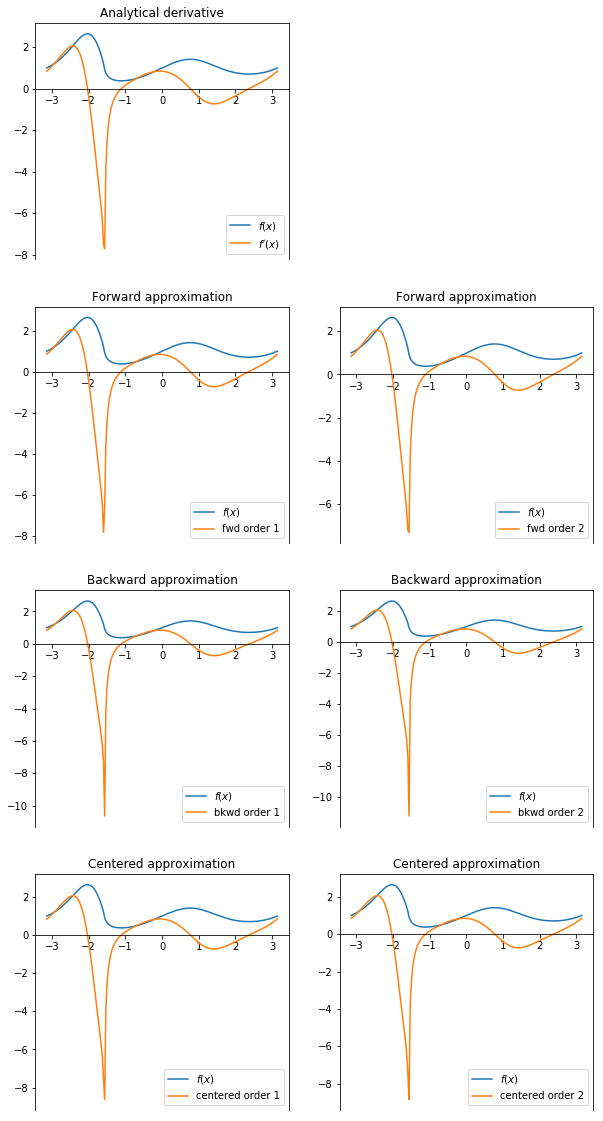

In [17]:
problem2()

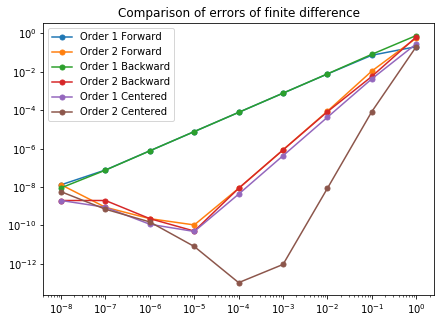

In [43]:
def problem3(x0):
    h_vec = np.logspace(-8, 0, 9)
    
    #get exact f_prime(x0)
    f, f_prime = sy_diff()
    exact = f_prime(x0)
    
    #forward difference with each h
    fwd = np.zeros(9)
    for i in range(9):
        fwd[i] = forward_diff1(f, x0, h_vec[i])
    #calculate error
    fwd_err = np.abs(fwd - exact)
    
    
    fwd2 = np.zeros(9)
    for i in range(9):
        fwd2[i] = forward_diff2(f, x0, h_vec[i])
    #calculate error
    fwd_err2 = np.abs(fwd2 - exact)
    
    
    
    bkwd = np.zeros(9)
    for i in range(9):
        bkwd[i] = backward_diff1(f, x0, h_vec[i])
    bkwd_err = np.abs(bkwd - exact)
    
    bkwd2 = np.zeros(9)
    for i in range(9):
        bkwd2[i] = backward_diff2(f, x0, h_vec[i])
    bkwd_err2 = np.abs(bkwd2 - exact)
    
    centered = np.zeros(9)
    for i in range(9):
        centered[i] = centered_diff1(f, x0, h_vec[i])
    centered_err = np.abs(centered - exact)
    
    centered2 = np.zeros(9)
    for i in range(9):
        centered2[i] = centered_diff2(f, x0, h_vec[i])
    centered_err2 = np.abs(centered2 - exact)
    
    plt.figure(figsize=(7,5))
    plt.title("Comparison of errors of finite difference")
    plt.plot(h_vec, fwd_err, "-o", markersize = 5, label = "Order 1 Forward")
    plt.plot(h_vec, fwd_err2, "-o", markersize = 5, label = "Order 2 Forward")
    plt.plot(h_vec, bkwd_err, "-o", markersize = 5, label = "Order 1 Backward")
    plt.plot(h_vec, bkwd_err2, "-o", markersize = 5, label = "Order 2 Backward")
    plt.plot(h_vec, centered_err, "-o", markersize = 5, label = "Order 1 Centered")
    plt.plot(h_vec, centered_err2, "-o", markersize = 5, label = "Order 2 Centered")
    plt.legend(loc = "upper left")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()
    

problem3(1)

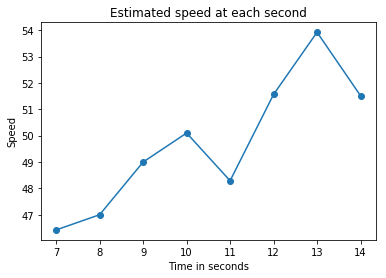

In [13]:
def problem4():
    # include plane.npy
    
    a = 500
    
    data = np.load("plane.npy")
    
    alpha_vec = data[:, 1]
    alpha_vec = np.deg2rad(alpha_vec)
    
    beta_vec = data[:, 2]
    beta_vec = np.deg2rad(beta_vec)
    
    x_vec = a * np.tan(beta_vec) / (np.tan(beta_vec) - np.tan(alpha_vec))
    y_vec = x_vec * np.tan(alpha_vec)
    #print(x_cord)
    
    x_prime = np.zeros(8)
    x_prime[0] = x_vec[1] - x_vec[0]
    for i in range(1, 7):
        x_prime[i] = (x_vec[i+1]-x_vec[i-1])/2
    x_prime[7] = x_vec[7] - x_vec[6]
    
    y_prime = np.zeros(8)
    y_prime[0] = y_vec[1] - y_vec[0]
    for i in range(1, 7):
        y_prime[i] = (y_vec[i+1]-y_vec[i-1])/2
    y_prime[7] = y_vec[7] - y_vec[6]
 
    speed = np.sqrt(x_prime**2 + y_prime**2)
    
    t_vec = np.arange(7, 15)
    plt.plot(t_vec, speed, "-o")
    plt.title("Estimated speed at each second")
    plt.xlabel("Time in seconds")
    plt.ylabel("Speed")
    plt.show()

        
    
problem4()

In [14]:
def problem5(f, x0, h):
    n = len(x0)
    m = len(f(x0))
    #f is from Rn to Rm
    #the jacobian is a m*n matrix
    jac = np.zeros((m, n))
    
    emat = np.eye(n)
    for i in range(n):
        jac[:,i] = (f(x0 + h * emat[:, i]) - f(x0 - h*emat[:, i])) / (2*h)
        
    return jac

def fff(x_vec):
    result = np.zeros(2)
    result[0] = x_vec[0]**2
    result[1] = x_vec[0]**3 - x_vec[1]
    return result

x0 = np.array([1,1])
problem5(fff, x0, 1e-5)
        
    

array([[ 2.,  0.],
       [ 3., -1.]])

The result matches analytic solution.

In [16]:
from datetime import datetime
from autograd import grad
import autograd.numpy as anp
def problem6():
    # sympy version of the function
    x = sy.symbols("x")
    f_sym = ln(sqrt(sin(sqrt(x))))
    
    start = datetime.now()
    deri_sym = sy.diff(f_sym)
    deri_sym = lambdify(x, deri_sym)
    result_sym = deri_sym(np.pi/4)
    end = datetime.now()
    time_sy = end - start
    
    
    # centered difference version
    func = lambda x : np.log(np.sqrt(np.sin(np.sqrt(x))))
    start = datetime.now()
    result_cent = centered_diff2(func, np.pi / 4, 1e-8)
    end = datetime.now()
    time_cd = end - start
    
    error_cd = np.abs(result_cent - result_sym)

    # grad version
    
    func2 = lambda x : anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
    start = datetime.now()
    grad_f = grad(func2)
    result_grad = grad_f(anp.pi / 4)
    end = datetime.now()
    time_gr = end - start
    error_gr = np.abs(result_grad - result_sym)
    
    print("Sympy solution, accurate result")
    print("Runtime: ", time_sy)
    
    print()
    print("Centered difference")
    print("Error: ", error_cd)
    print("Runtime: ", time_cd)
    
    print()
    print("Grad method")
    print("Error: ", error_gr)
    print("Runtime: ", time_gr)
    
    return result_grad

problem6()

Sympy solution, accurate result
Runtime:  0:00:00.003502

Centered difference
Error:  1.019366396848298e-08
Runtime:  0:00:00.000029

Grad method
Error:  5.551115123125783e-17
Runtime:  0:00:00.000193


0.23025901114696085

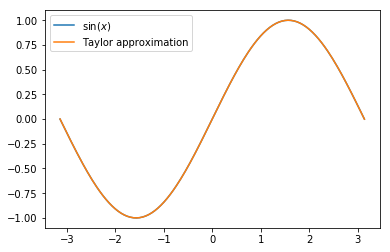

Observe that if tolerence is large, we can spot the difference between true sin function and the approximated taylor expression.


In [53]:
def taylor_sin(x, tol = 0.01):
    #return the taylor expansion of sin(x) around 0, evaluated at x
    result = x
    cur_term = x
    i = 1
    while np.abs(cur_term) >= tol:

        cur_term = x**(2*i+1) / np.math.factorial(2*i+1) * (-1) ** i 
        result = result + cur_term
        i += 1
    return result
    
    
xxx = np.linspace(-np.pi, np.pi, 200)
yyy = np.array([])
for xx in xxx:
    yyy=np.append(yyy, taylor_sin(xx))
    
plt.plot(xxx, np.sin(xxx), label = r"$\sin(x)$")
plt.plot(xxx, yyy , label = "Taylor approximation")
plt.legend()
plt.show()
print("Observe that if tolerence is large, we can spot the difference between true sin function and the approximated taylor expression.")
      

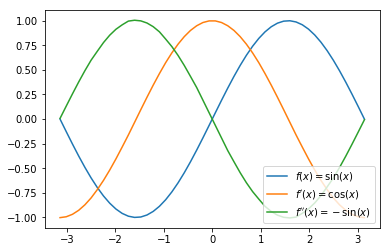

In [57]:
def problem7():
    first_deri = grad(taylor_sin)
    second_deri = grad(first_deri)
    xxx = np.linspace(-np.pi, np.pi)
    
    original = np.sin(xxx)
    dsin = np.array([])
    ddsin = np.array([])
    for xx in xxx:
        dsin = np.append(dsin, first_deri(xx))
        ddsin = np.append(ddsin, second_deri(xx))
    plt.plot(xxx, original, label = r"$f(x) = \sin(x)$")
    plt.plot(xxx, dsin, label = r"$f^\prime(x) = \cos(x)$")
    plt.plot(xxx, ddsin, label = r"$f^{\prime \prime}(x) = - \sin(x)$")
    plt.legend(loc = "lower right")
    
problem7()

In [74]:
#problem 8
from autograd import elementwise_grad
from autograd import jacobian
from sympy.matrices import *

def problem8():
    
    points = np.array([1,1])
    
    #sympy version
    x, y = sy.symbols("x y")
    func1_sy = exp(x)*sin(y) + y**3
    func2_sy = 3*y - cos(x)
    func_sy = Matrix([func1_sy, func2_sy])
    
    start = datetime.now()
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    end = datetime.now()
    print("Sympy method: ")
    print( jac_func(1,1))
    print("Time: ", end - start)
    
    print()
    
    #grad version 
    func_g = lambda x_vec : anp.array([anp.exp(x_vec[0])*anp.sin(x_vec[1]) + x_vec[1]**3, 3*x_vec[1]-anp.cos(x_vec[0])])
    start = datetime.now()
    jac_g = jacobian(func_g)
    result = jac_g(anp.array([1.0,1.0]))
    end = datetime.now()
    print("Grad method: ")
    print(result)
    print("Time: ", end - start)
    
    
    
    return result

problem8()
    

Sympy method: 
[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
Time:  0:00:00.004378

Grad method: 
[[2.28735529 4.46869394]
 [0.84147098 3.        ]]
Time:  0:00:00.003276


array([[2.28735529, 4.46869394],
       [0.84147098, 3.        ]])